In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

df = pd.read_csv('C:/Everything/Data/Real-Data/real_Combine.csv')
x = df.iloc[:,:-1] #independent varible
y = df.iloc[:,-1] #dependent varible

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833
1,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833
2,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
3,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
4,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1,154.037500


In [2]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()
rf_random.fit(X_train,y_train)

C:\Users\vivek.aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [3]:
print("Coefficient of determination R^2 <-- on train set: {}".format(rf_random.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on train set: {}".format(rf_random.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9777000400592639
Coefficient of determination R^2 <-- on train set: 0.8709799226376236


In [4]:
rf_score=cross_val_score(rf_random,x,y,cv=2)
rf_score.mean()

0.6059731366668393

In [5]:
rf_pred = rf_random.predict(X_test)

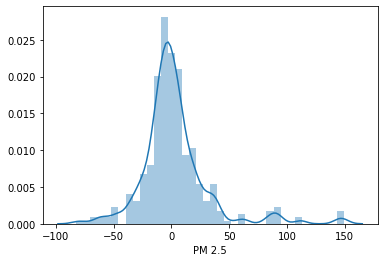

In [6]:
sns.distplot(y_test-rf_pred)

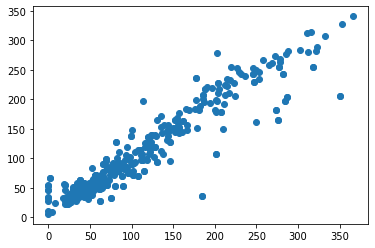

In [7]:
plt.scatter(y_test,rf_pred)

In [8]:
from sklearn.model_selection import RandomizedSearchCV

In [9]:
n_estimators = [int(i) for i in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [11]:
#Randomized Search CV


n_estimators   #No.of trees in random forest

max_features = ['auto', 'sqrt']   #No.pf features to consider a every split

max_depth = [int(i) for i in np.linspace(5, 30, num=6)]  #max levels in a tree

min_samples_split = [2, 5, 10, 15, 100]  #min no.of samoles needed to split a node

min_samples_leaf = [1, 2, 5, 10]  #min no.of samples required at each node

In [12]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [13]:
rf = RandomForestRegressor()

In [14]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [15]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.0s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 13.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [16]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [17]:
rf_random.best_score_

-981.3904166236781

In [18]:
rf_pred = rf_random.predict(X_test)

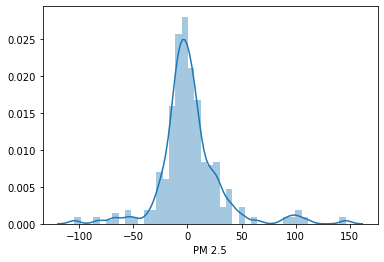

In [19]:
sns.distplot(y_test-rf_pred)

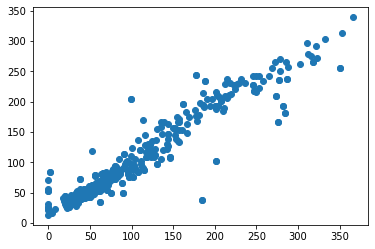

In [20]:
plt.scatter(y_test, rf_pred)

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

MAE: 18.330427220959717
MSE: 863.5346637316123
RMSE: 29.385960316648024


In [22]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)